In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simtk import unit

# Free Particle

The free particle is characterized for having no external potential goberning its motion. In the case of temperature and friction abscence the particle is moving in a uniform rectilineous trajectory. And when temperature and friction are present, we have nothing but a stochastic brownian particle or random walker characterized by magnitudes as diffusion.

## Working with this test system

The python class representing this test system is fully documented in [FreeParticle class API](../api/_autosummary/uibcdf_test_systems.FreeParticle.html). Let's see an example of how to interact with it:

In [2]:
from openmolecularsystems import FreeParticle

open_molecular_system = FreeParticle(n_particles=1, mass=64*unit.amu)

In [3]:
open_molecular_system.parameters

{'n_particles': 1, 'mass': Quantity(value=64, unit=dalton)}

In [4]:
open_molecular_system.coordinates

Quantity(value=array([[0., 0., 0.]], dtype=float32), unit=nanometer)

In [5]:
open_molecular_system.topology

In [6]:
open_molecular_system.system

<simtk.openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x7fd88607e900> >

## Newtonian dynamics

In [7]:
from openmolecularsystems.tools.md import newtonian

In [8]:
initial_velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds
initial_velocities[0,0] = 0.10 * unit.nanometers/unit.picoseconds

In [9]:
traj_dict = newtonian(open_molecular_system, time=0.5*unit.nanoseconds, saving_timestep=1.0*unit.picoseconds,
                      integration_timestep=0.01*unit.picoseconds, initial_velocities=initial_velocities)

100%|██████████| 50000/50000 [00:00<00:00, 71563.72it/s]


In [10]:
traj_dict.keys()

dict_keys(['time', 'coordinates', 'potential_energy', 'kinetic_energy'])

We can plot the trajectory of the system along the $X$ axis:

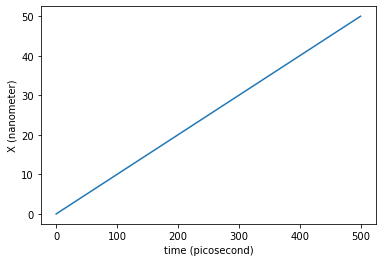

In [11]:
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,0,0])
plt.xlabel('time ({})'.format(traj_dict['time'].unit))
plt.ylabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.show()

And with external friction:

In [12]:
traj_dict = newtonian(open_molecular_system, time=0.5*unit.nanoseconds, saving_timestep=1.0*unit.picoseconds,
                      integration_timestep=0.01*unit.picoseconds, friction=0.10/unit.picoseconds,
                      initial_velocities=initial_velocities)

100%|██████████| 50000/50000 [00:00<00:00, 71875.09it/s]


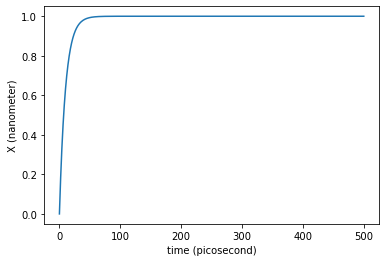

In [13]:
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,0,0])
plt.xlabel('time ({})'.format(traj_dict['time'].unit))
plt.ylabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.show()

## Stochastic Dynamics

In [14]:
from openmolecularsystems.tools.md import langevin_NVT

In [15]:
open_molecular_system = FreeParticle(n_particles = 100, mass = 64 * unit.amu)
traj_dict = langevin_NVT(open_molecular_system, time=0.5*unit.nanoseconds, saving_timestep=1.0*unit.picoseconds,
                         integration_timestep=0.01*unit.picoseconds,
                         friction=1.00/unit.picoseconds, temperature=300.0*unit.kelvin,
                         initial_velocities='boltzmann')

100%|██████████| 50000/50000 [00:00<00:00, 71005.34it/s]


We represent now the stochastic trajectory of our free particle along the axis $X$ in time:

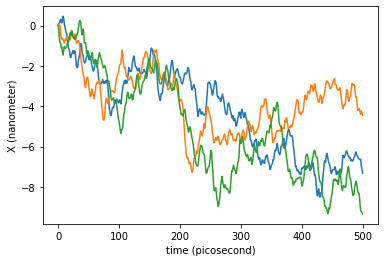

In [16]:
particle_index=50

plt.plot(traj_dict['time'], traj_dict['coordinates'][:,particle_index,0])
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,particle_index,1])
plt.plot(traj_dict['time'], traj_dict['coordinates'][:,particle_index,2])
plt.xlabel('time ({})'.format(traj_dict['time'].unit))
plt.ylabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.show()

Or over the plane $X,Y$:

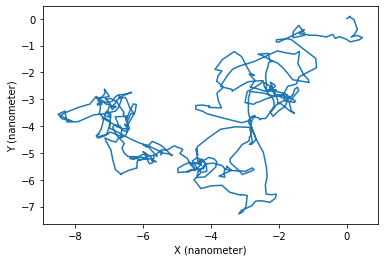

In [17]:
plt.plot(traj_dict['coordinates'][:,particle_index,0], traj_dict['coordinates'][:,particle_index,1])
plt.xlabel('X ({})'.format(traj_dict['coordinates'].unit))
plt.ylabel('Y ({})'.format(traj_dict['coordinates'].unit))
plt.show()